<a href="https://colab.research.google.com/github/Gilbert9172/CSAI_assignment/blob/main/n221a_decision_trees_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 1*

# 📝 Assignment
---

# Decision Trees(결정트리)

# 캐글 인클래스(InClass) Competitions

### 1) EDA를 수행합시다

- [캐글 계정을 만드세요](https://www.kaggle.com/), 공유된 인클래스 대회 url을 통해 이동한 후 대회에 참여하세요.
- H1N1 데이터를 훈련/검증/테스트 셋으로 나누어 준비하세요
- profiling을 사용하여 데이터를 살펴보고, missing value, zeros, cardinarity 등을 확인하여 처리하세요.
- 본인만의 특성공학을 수행하세요.
- **(객관식) H1N1 분류기의 기준모델을 설정하세요. 기준모델의 정확도를 과제 제출폼에 제출하세요.**
    1. 0.24
    2. 0.50
    3. 0.76
    4. 1


In [50]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split

target = 'vacc_h1n1_f'

train_data = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')

In [52]:
train, val = train_test_split(train_data, train_size=0.80, test_size=0.20, 
                              stratify=train_data[target], random_state=2)

In [53]:
train[target].value_counts(normalize=True)

0    0.760935
1    0.239065
Name: vacc_h1n1_f, dtype: float64

In [54]:
# minimal = True 
# This is a default configuration that disables expensive computations (such as correlations and duplicate row detection

# from pandas_profiling import ProfileReport
# profile = ProfileReport(train, minimal=False).to_notebook_iframe()

# Missing cells	256993
# Missing cells 15.6%
# Duplicate rows 0
# Duplicate rows 0%

In [55]:
train.T.duplicated()

h1n1_concern                   False
h1n1_knowledge                 False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_h1n1               False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_insurance               False
health_worker                  False
opinion_h1n1_vacc_effective    False
opinion_h1n1_risk              False
opinion_h1n1_sick_from_vacc    False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
agegrp                         False
education_comp                 False
raceeth4_i                     False
sex_i                          False
inc_pov                        False
marital                        False
r

In [56]:
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
employment_status,25466,3,Employed,13722
census_msa,33723,3,"MSA, Not Principle City",15202
opinion_h1n1_vacc_effective,26637,6,Somewhat Effective,11710
opinion_h1n1_risk,26602,6,Somewhat Low,9980
opinion_h1n1_sick_from_vacc,26568,6,Not Very Worried,9229
opinion_seas_vacc_effective,26519,6,Somewhat Effective,11571
opinion_seas_risk,26466,6,Somewhat Low,9057
opinion_seas_sick_from_vacc,26413,6,Not At All Worried,11813
agegrp,33723,7,65+ Years,6821
employment_industry,13714,23,Health Care and Social Assistance Industries,2451


In [57]:
train['employment_occupation'].value_counts()

Management Occupations                                       1769
Office and Administrative Support Occupations                1556
Education, Training, and Library Occupations                 1286
Healthcare Practitioners and Technical Occupations           1200
Sales and Related Occupations                                1108
Business and Financial Operations Occupations                 764
Construction and Extraction Occupations                       538
Transportation and Material Moving Occupations                483
Production Occupations                                        483
Computer and Mathematical Occupations                         475
Food Preparation and Serving Related Occupations              405
Architecture and Engineering Occupations                      367
Arts, Design, Entertainment, Sports and Media Occupations     366
Personal Care and Service Occupations                         353
Community and Social Services Occupations                     335
Building a

In [58]:
import numpy as np

def engineer(df):
    selected_cols = df.select_dtypes(include=['number', 'object'])
    labels = selected_cols.nunique() 
    selected_features = labels[labels <= 30].index.tolist() 
    df = df[selected_features]

    df.drop(['employment_industry','employment_occupation'], axis = 1, inplace=True)    
    return df

train = engineer(train)
val = engineer(val)
test = engineer(test)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
features = train.drop(columns=[target]).columns

In [60]:
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]

In [61]:
from sklearn.metrics import accuracy_score

major = y_train.mode()[0]
y_pred = [major] * len(y_train)

acc = accuracy_score(y_train, y_pred)
print(f'Accuracy = {acc:.4f}')

Accuracy = 0.7609


# 2) 모델 개발
- 결정트리를 학습시킵니다. 하이퍼파라미터를 수정하여 성능을 높여보세요. 과적합을 주의하세요!
- 검증세트 스코어를 확인하세요.(평가지표는 F1-score입니다, 수식은 캐글 Overview-Evaluation 페이지를 확인해 주세요. 평가지표에 대한 내용은 다음에 자세히 배우고 활용할 것입니다 지금은 스코어를 올리기 위한 노력을 전혀 기울이지 말고 결정트리의 개념과 코드이해, 사용에 집중하세요!)
- 특성중요도를 그래프로 나타내 보세요
- **검증세트의 F1-score를 과제 제출폼에 제출하세요. (0.5 이상 통과)**

In [62]:
pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.7/dist-packages (2.2.2)


In [63]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [84]:
# 손씻기, 야외 활동 등, 소수로 쓸수 없는 값들이 많아, SimpleImputer(strategy = 'median') 사용

from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy = 'median'), 
    DecisionTreeClassifier(min_samples_leaf=11,max_depth=5, criterion='entropy', random_state=1)
)

pipe.fit(X_train, y_train)
print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도 0.8113453725943718
검증 정확도 0.8160360574071878


In [85]:
from sklearn.metrics import f1_score
y_val_pred = pipe.predict(X_val)
f1 = f1_score(y_val, y_val_pred)
print(f1)

0.5779591836734693


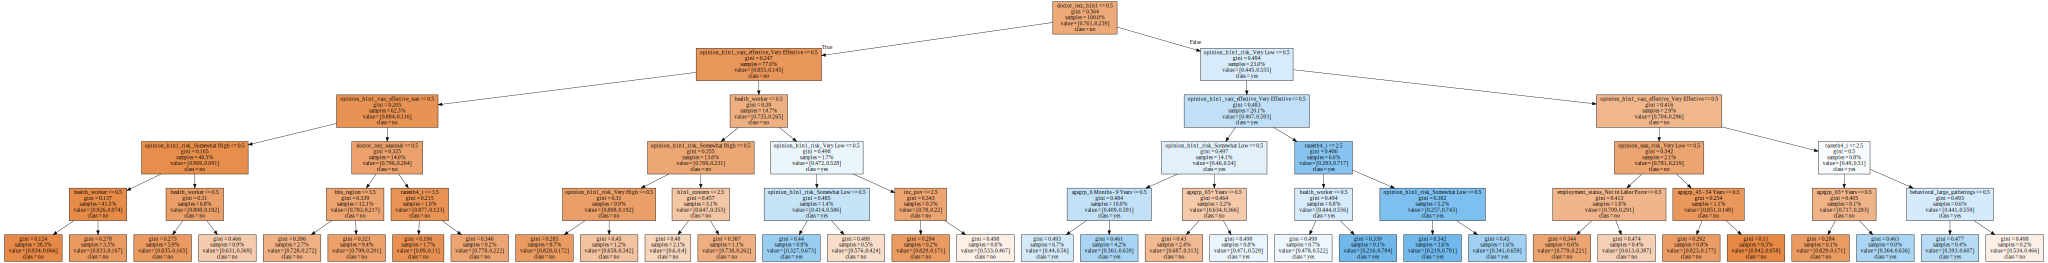

In [66]:
import graphviz
from sklearn.tree import export_graphviz

model_dt = pipe.named_steps['decisiontreeclassifier']
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

dot_data = export_graphviz(model_dt
                          , max_depth=5
                          , feature_names=encoded_columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))

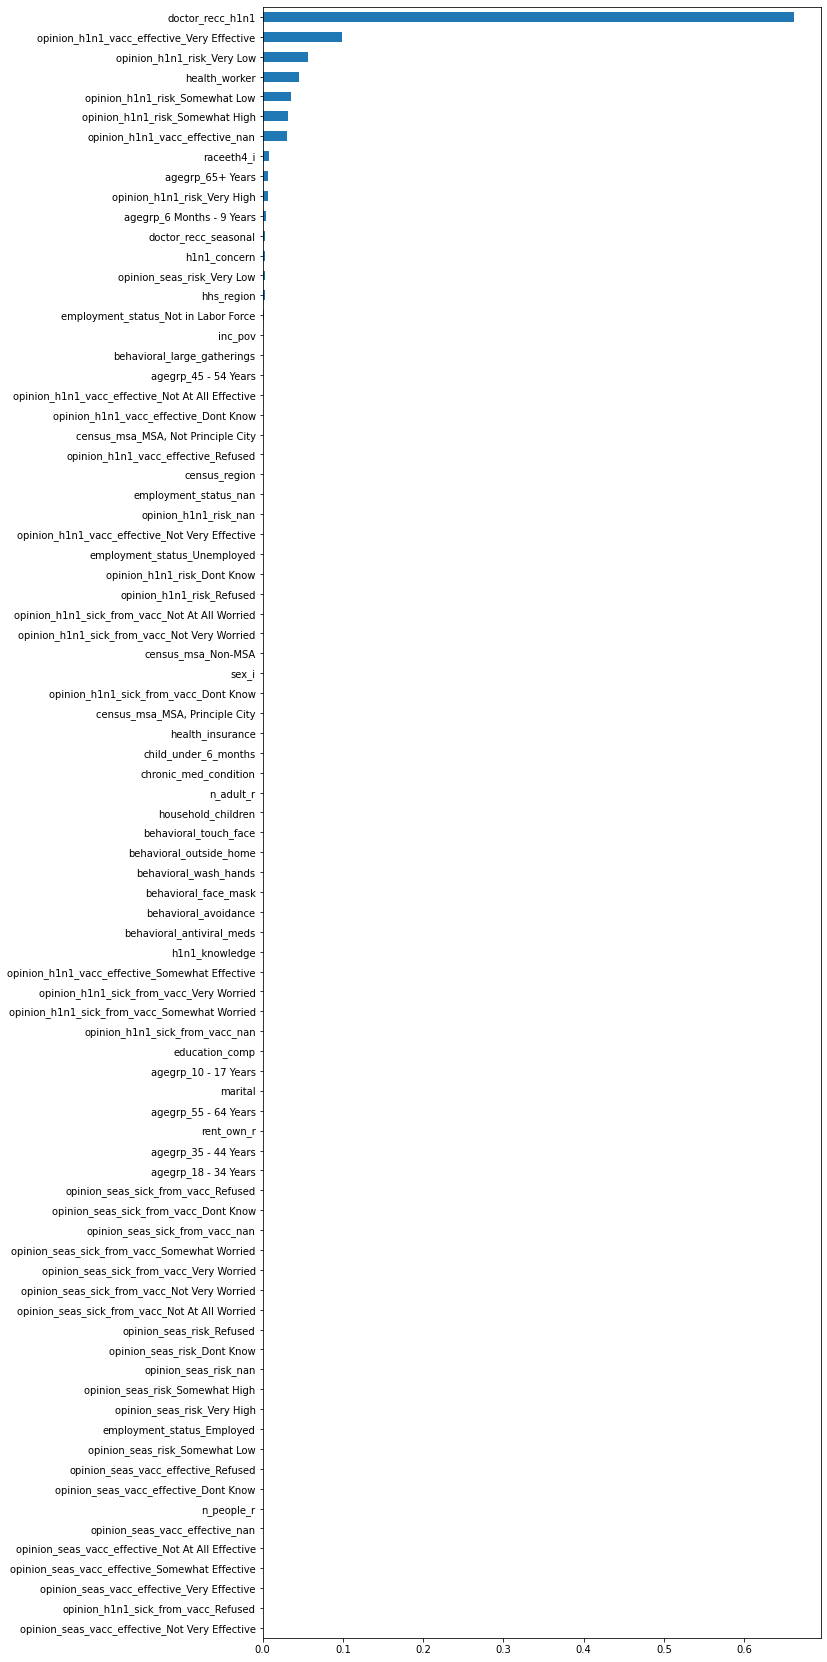

In [67]:
import matplotlib.pyplot as plt

model_dt = pipe.named_steps['decisiontreeclassifier']
importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

# 3) 캐글 대회 참여

- 테스트셋에 대한 예측 결과를 캐글에 제출 하세요.(스코어가 많이 낮게 나와도 결정트리를 잘 이해하고 결과를 내었다면 충분합니다!)
- **캐글 Leaderboard의 본인 Score를 과제 제출폼에 제출하세요.**
 

In [68]:
y_predict = pipe.predict(X_test)

sample_submission = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv')

sample_submission['vacc_h1n1_f'] = y_predict

sample_submission = sample_submission.set_index('Id')

sample_submission

,vacc_h1n1_f
Id,
0,0
1,0
2,0
3,0
4,0
...,...
28099,0
28100,0
28101,0


In [69]:
# sample_submission.to_csv('submission_g.csv')